<a href="https://colab.research.google.com/github/webdevil80/IPSVIP/blob/main/Task4/IPSVIP_Task4_HousingPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#InfoPillar Solution Pvt Ltd
## IPS Virtual Remote Internship

---

####Task :- Housing Pricing Prediction using ML
#### Dataset: http://lib.stat.cmu.edu/datasets/boston
#### **AUTHOR : VETRIVEL D**

#**Importing the libraries and import database**

In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import dataset
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
#initialize the dataframe
data = pd.DataFrame(boston.data)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Adding feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#declare target variable 
data['PRICE_VAL'] = boston.target

In [8]:
data.shape

(506, 14)

In [9]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE_VAL'],
      dtype='object')

In [10]:
data.dtypes

CRIM         float64
ZN           float64
INDUS        float64
CHAS         float64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD          float64
TAX          float64
PTRATIO      float64
B            float64
LSTAT        float64
PRICE_VAL    float64
dtype: object

In [11]:
#Checking missing values
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
PRICE_VAL    0
dtype: int64

In [12]:
#describe our data and find correlation for the data
data.describe()
corr = data.corr()
corr.shape

(14, 14)

#**Spliting data as  predict_value-X  and  target_value-y**

In [13]:
X = data.drop(['PRICE_VAL'], axis = 1)
y = data['PRICE_VAL']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

#**Importing random Forest regressor**

In [15]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
#model prediction
y_pred = reg.predict(X_train)
y_pred

array([23.07 , 18.68 , 19.983, 13.681, 48.088, 21.954, 47.663, 13.984,
       20.826, 48.972, 34.495,  9.543, 15.563, 22.667, 24.607, 25.196,
       18.027, 46.114, 22.99 , 21.138, 18.345, 19.186, 19.418, 14.658,
       22.792, 14.816, 15.612, 45.88 , 20.671, 14.188, 16.933, 21.709,
       21.796, 21.574, 23.542, 18.1  , 16.244,  5.492,  8.877, 26.04 ,
       18.936, 21.315, 30.113,  6.155, 11.609,  7.635, 33.152, 14.802,
       12.807, 26.44 , 17.419,  6.4  , 23.093, 23.456, 22.786, 18.634,
       13.536, 23.213, 24.678, 15.131,  9.657, 22.135, 23.112, 27.034,
       14.675, 18.855, 20.22 , 15.006, 20.296, 17.817, 20.229, 42.293,
       32.326, 20.259, 17.032, 19.369, 21.514, 32.657, 46.092, 33.164,
       20.601, 21.26 ,  8.846, 12.283, 14.208, 22.884, 18.418, 21.301,
       21.654, 21.231, 17.552, 22.64 , 35.278, 28.756, 12.141, 19.506,
       22.108,  9.362, 21.552, 19.232, 20.882, 23.537, 23.533, 16.873,
       25.906, 49.414, 10.05 , 18.096, 13.956, 15.599, 17.249, 16.   ,
      

In [26]:
op_train1 = pd.DataFrame({
    'Actual' : y_train,
    'Predicted':y_pred
})
op_train1

,Actual,Predicted
84,23.9,23.070
354,18.2,18.680
221,21.7,19.983
34,13.5,13.681
267,50.0,48.088
...,...,...
385,7.2,8.254
197,30.3,31.423
439,12.8,12.514
174,22.6,21.831


#**Visualizing the differences between actual prices and predicted values**


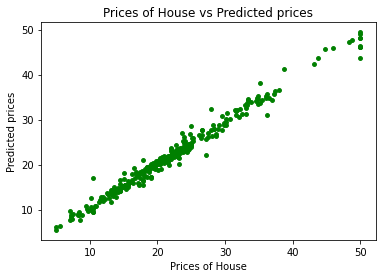

In [18]:
plt.scatter(y_train, y_pred, s=15, c="green")
plt.xlabel("Prices of House")
plt.ylabel("Predicted prices")
plt.title("Prices of House vs Predicted prices")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


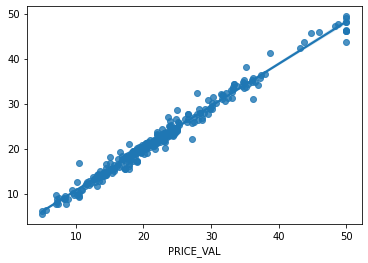

In [24]:
sns.regplot(y_train,y_pred)

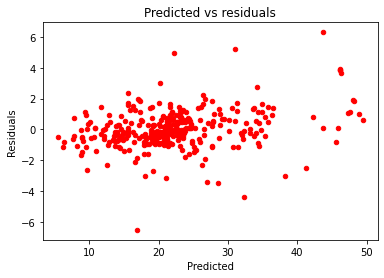

In [20]:
plt.scatter(y_pred,y_train-y_pred, s=20, c="red")
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#**Find Errors**

In [17]:
#finnd MAE, MSE, RMSE errors
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 0.8474293785310731
MSE: 1.5428056101694938
RMSE: 1.2420972627654783


#**Conclusion :**
* RandomForestRegressor is the perfectly suitable method for predict house pricing value in this dataset
* r-square or R2 Score of this prediction is 97% Accurate on this Dataset


#**THANK YOU**